In [1]:
%load_ext autoreload

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

%matplotlib inline 

In [2]:
df = pd.read_csv("../data/train.csv")
df.head()

,id,annotation,width,height,cell_type,plate_time,sample_date,sample_id,elapsed_timedelta
0,0030fd0e6378,118145 6 118849 7 119553 8 120257 8 120961 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
1,0030fd0e6378,189036 1 189739 3 190441 6 191144 7 191848 8 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
2,0030fd0e6378,173567 3 174270 5 174974 5 175678 6 176382 7 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
3,0030fd0e6378,196723 4 197427 6 198130 7 198834 8 199538 8 2...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00
4,0030fd0e6378,167818 3 168522 5 169225 7 169928 8 170632 9 1...,704,520,shsy5y,11h30m00s,2019-06-16,shsy5y[diff]_E10-4_Vessel-714_Ph_3,0 days 11:30:00


In [3]:
def rle_size(rle):
    """
    Returns size of single RLE. 

    """
    
    split  = rle.split()
    np_rle = np.array(split, dtype = np.uint64)
    
    lengths = np_rle[1 :: 2]
    
    size = lengths.sum()
    
    return size


In [4]:
cell_types = ["cort", "astro", "shsy5y"]

cort_sizes   = []
astro_sizes  = []
shsy5y_sizes = []

cort_ids   = df[df["cell_type"] == "cort"].id.unique()
astro_ids  = df[df["cell_type"] == "astro"].id.unique()
shsy5y_ids = df[df["cell_type"] == "shsy5y"].id.unique()


In [5]:
sizes = {
    "cort"   : [],
    "astro"  : [],
    "shsy5y" : []
}

unique_ids = {
    "cort"   : cort_ids,
    "astro"  : astro_ids,
    "shsy5y" : shsy5y_ids
}

for cell_type in cell_types:
    ids = unique_ids[cell_type]
    for ID in ids:
        id_df          = df[df["id"] == ID]
        id_annotations = id_df["annotation"].tolist()

        for annotation in id_annotations:
            sizes[cell_type].append(
                rle_size(annotation)
            )


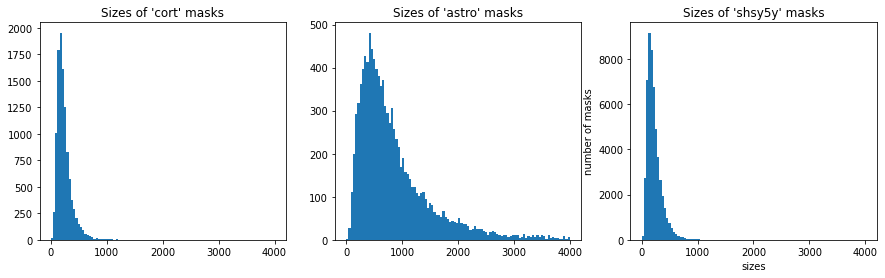

In [6]:
num_bins  = 100
plt_range = [0, 4000]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (15, 4))

plt.xlabel("sizes")
plt.ylabel("number of masks")

ax1.set_title("Sizes of 'cort' masks")
ax1.hist(sizes["cort"], 100, range = plt_range)

ax2.set_title("Sizes of 'astro' masks")
ax2.hist(sizes["astro"], 100, range = plt_range)

ax3.set_title("Sizes of 'shsy5y' masks")
ax3.hist(sizes["shsy5y"], 100, range = plt_range)

plt.show()

In [7]:
print("cort")
print(pd.DataFrame(sizes["cort"]).describe().transpose())
print()

print("astro")
print(pd.DataFrame(sizes["astro"]).describe().transpose())
print()

print("shsy5y")
print(pd.DataFrame(sizes["shsy5y"]).describe().transpose())

cort
     count        mean         std   min    25%    50%    75%     max
0  10777.0  240.164517  139.166373  33.0  151.0  208.0  288.0  2054.0

astro
     count       mean         std   min    25%    50%     75%      max
0  10522.0  905.80574  855.187699  37.0  407.0  665.0  1098.0  13327.0

shsy5y
     count        mean        std   min    25%    50%    75%     max
0  52286.0  224.496328  133.93878  30.0  133.0  193.0  280.0  2254.0


In [8]:
cort_size_df   = pd.DataFrame(sizes["cort"])
astro_size_df  = pd.DataFrame(sizes["astro"])
shsy5y_size_df = pd.DataFrame(sizes["shsy5y"])

print("cort")
l = cort_size_df.quantile(0.05)[0]
r = cort_size_df.quantile(0.95)[0]
print(f"lo : {l} | hi : {r}")
print()

print("astro")
l = astro_size_df.quantile(0.05)[0]
r = astro_size_df.quantile(0.95)[0]
print(f"lo : {l} | hi : {r}")
print()

print("shsy5y")
l = shsy5y_size_df.quantile(0.05)[0]
r = shsy5y_size_df.quantile(0.95)[0]
print(f"lo : {l} | hi : {r}")


cort
lo : 95.0 | hi : 497.0

astro
lo : 185.0 | hi : 2380.0

shsy5y
lo : 77.0 | hi : 478.0
